In [1]:
from math import *
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt


from CH4eMetricEmissions import functions as CH4efunctions
from CO2eMetricEmissions import functions as CO2efunctions

# CO2 Equivalent Testing

## Testing the basic Metric Emissions tool

This tool takes in a dataframe consisting of a "Year" column and an "SLCP Emissions" column and computes a collection of CO2 equivalent emissions pertaining to different metrics.

In [2]:
# Calculate Metric Emissions

TimePeriod = 349  # Years
SLCPEmissions = np.ones(TimePeriod).tolist()
SLCPEmissions[0:149] = np.zeros(150).tolist()
Years = np.arange(1850, 2200).tolist()


SLCPTimeSeries = pd.DataFrame(data={'Year': Years, 'SLCP Emissions': SLCPEmissions})

CH4StepTestEmissionsOutput = CO2efunctions.addMetricEmissions(SLCPTimeSeries)
CH4StepTestEmissionsOutput.head()

/Users/student/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


,Year,SLCP Emissions,CFE,GWP*,CGWP,CGTP,GWP100,GWP20,GTP100,GTP20
0,1850,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1851,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1852,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1853,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1854,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


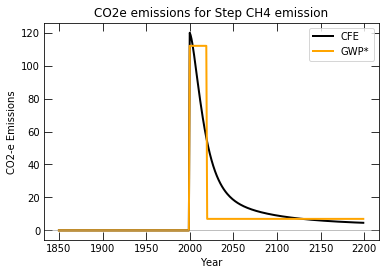

In [3]:
t = CH4StepTestEmissionsOutput['Year']
s = CH4StepTestEmissionsOutput['CFE']
v = CH4StepTestEmissionsOutput['GWP*']

fig, (ax) = plt.subplots()
ax.plot(t, s, color = 'black',linewidth = 2,label='CFE')
ax.plot(t, v, color = 'orange',linewidth = 2,label='GWP*')
ax.tick_params(axis='both',direction='in',length=8,right=True,top=True)
plt.legend()
# plt.xlim(0,200)
# plt.ylim(0,0.1)
ax.axhline(linewidth = 0.5, color='gray')

ax.set(xlabel='Year', ylabel='CO2-e Emissions',
       title='CO2e emissions for Step CH4 emission')
plt.show()
# plt.savefig('ITMO Graphs/CO2 Continuous Metric Emissions.png',dpi=500)

## Testing the GIR Input Style metric tool

This version takes in a range of scenarios and gases using the same format used in GIR. For each metric "method" specified a new "scenario" will be added to the returned dataframe for each original "scenario" in the GIR input. This allows us to quickly go from a multi-gas set of input emissions to a broad range of equivalents, and model their temperature impacts, without the need for reformatting.

In [2]:
# GIRTestScenarioNames = ['Pulse','Step']

start_year = 1850
end_year = 2200
timestep = 1
scen_names=['Pulse','Step']
gases_in = ['CO2','CH4','N2O']


CH4GIREmissions = pd.DataFrame(index=np.arange(start_year,end_year+1,timestep)+(timestep!=1)*timestep/2,columns=pd.MultiIndex.from_product([scen_names,gases_in],names=['Scenario','Gas'])).fillna(0).apply(pd.to_numeric)
CH4GIREmissions.index.rename('Year',inplace=True)



# Add emissions to the dataframe, N.B. GIR CO2 inputs are in GtC, CH4 and N2O in MtCH4 and MtN20-N2 respectively
K = 1000
GIRConversionCO2 = 12.0107/44.0095 # Convert GtCO2 -> GtC
GIRConversionCH4 = 1
GIRConversionN2O = 28.0134/44.013 # Convert MtN2O -> MtN2


TimePeriod = 351  # Years
Years = np.arange(1850, 2200).tolist()

# Pulse Emissions
PulseSLCPEmissions = np.zeros(TimePeriod).tolist()
PulseSLCPEmissions[150] = 1

# Step Emissions
StepSLCPEmissions = np.ones(TimePeriod).tolist()
StepSLCPEmissions[0:150] = np.zeros(150).tolist()


# Non-Metric Gas Emissions

CH4GIREmissions['Pulse','CH4'] = PulseSLCPEmissions
CH4GIREmissions['Step','CH4'] = StepSLCPEmissions
CH4GIREmissions['Pulse','CO2'] = PulseSLCPEmissions
CH4GIREmissions['Step','CO2'] = StepSLCPEmissions
CH4GIREmissions['Pulse','N2O'] = PulseSLCPEmissions
CH4GIREmissions['Step','N2O'] = StepSLCPEmissions

CH4GIREmissions.head()

Scenario Pulse           Step          
Gas        CO2  CH4  N2O  CO2  CH4  N2O
Year                                   
1850.0     0.0  0.0  0.0  0.0  0.0  0.0
1851.0     0.0  0.0  0.0  0.0  0.0  0.0
1852.0     0.0  0.0  0.0  0.0  0.0  0.0
1853.0     0.0  0.0  0.0  0.0  0.0  0.0
1854.0     0.0  0.0  0.0  0.0  0.0  0.0

In [3]:
Methods = ["CFE", "GWP*"]

CO2eGIR = CO2efunctions.addCO2eMetricEmissions(CH4GIREmissions, Methods)

In [4]:
CO2eGIR[['Pulse','Step','Pulse - CFE','Step - CFE']].loc[1980:2020]

Scenario Pulse           Step           Pulse - CFE            Step - CFE  \
Gas        CO2  CH4  N2O  CO2  CH4  N2O         CO2  CH4  N2O         CO2   
Year                                                                        
1980.0     0.0  0.0  0.0  0.0  0.0  0.0    0.000000  0.0  0.0    0.000000   
1981.0     0.0  0.0  0.0  0.0  0.0  0.0    0.000000  0.0  0.0    0.000000   
1982.0     0.0  0.0  0.0  0.0  0.0  0.0    0.000000  0.0  0.0    0.000000   
1983.0     0.0  0.0  0.0  0.0  0.0  0.0    0.000000  0.0  0.0    0.000000   
1984.0     0.0  0.0  0.0  0.0  0.0  0.0    0.000000  0.0  0.0    0.000000   
1985.0     0.0  0.0  0.0  0.0  0.0  0.0    0.000000  0.0  0.0    0.000000   
1986.0     0.0  0.0  0.0  0.0  0.0  0.0    0.000000  0.0  0.0    0.000000   
1987.0     0.0  0.0  0.0  0.0  0.0  0.0    0.000000  0.0  0.0    0.000000   
1988.0     0.0  0.0  0.0  0.0  0.0  0.0    0.000000  0.0  0.0    0.000000   
1989.0     0.0  0.0  0.0  0.0  0.0  0.0    0.000000  0.0  0.0    0.000000   
1990.0     0.0  0.0  0.0  0.0  0.0  0.0    0.000000  0.0  0.0    0.000000   
1991.0     0.0  0.0  0.0  0.0  0.0  0.0    0.000000  0.0  0.0    0.000000   
1992.0     0.0  0.0  0.0  0.0  0.0  0.0    0.000000  0.0  0.0    0.000000   
1993.0     0.0  0.0  0.0  0.0  0.0  0.0    0.000000  0.0  0.0    0.000000   
1994.0     0.0  0.0  0.0  0.0  0.0  0.0    0.000000  0.0  0.0    0.000000   
1995.0     0.0  0.0  0.0  0.0  0.0  0.0    0.000000  0.0  0.0    0.000000   
1996.0     0.0  0.0  0.0  0.0  0.0  0.0    0.000000  0.0  0.0    0.000000   
1997.0     0.0  0.0  0.0  0.0  0.0  0.0    0.000000  0.0  0.0    0.000000   
1998.0     0.0  0.0  0.0  0.0  0.0  0.0    0.000000  0.0  0.0    0.000000   
1999.0     0.0  0.0  0.0  0.0  0.0  0.0    0.000000  0.0  0.0    0.000000   
2000.0     1.0  1.0  1.0  1.0  1.0  1.0  148.944582  0.0  0.0  148.944582   
2001.0     0.0  0.0  0.0  1.0  1.0  1.0   -1.439808  0.0  0.0  147.504774   
2002.0     0.0  0.0  0.0  1.0  1.0  1.0   -2.263419  0.0  0.0  145.241354   
2003.0     0.0  0.0  0.0  1.0  1.0  1.0   -2.883342  0.0  0.0  142.358013   
2004.0     0.0  0.0  0.0  1.0  1.0  1.0   -3.336767  0.0  0.0  139.021245   
2005.0     0.0  0.0  0.0  1.0  1.0  1.0   -3.654719  0.0  0.0  135.366526   
2006.0     0.0  0.0  0.0  1.0  1.0  1.0   -3.863037  0.0  0.0  131.503489   
2007.0     0.0  0.0  0.0  1.0  1.0  1.0   -3.983206  0.0  0.0  127.520283   
2008.0     0.0  0.0  0.0  1.0  1.0  1.0   -4.033050  0.0  0.0  123.487233   
2009.0     0.0  0.0  0.0  1.0  1.0  1.0   -4.027329  0.0  0.0  119.459905   
2010.0     0.0  0.0  0.0  1.0  1.0  1.0   -3.978228  0.0  0.0  115.481676   
2011.0     0.0  0.0  0.0  1.0  1.0  1.0   -3.895783  0.0  0.0  111.585893   
2012.0     0.0  0.0  0.0  1.0  1.0  1.0   -3.788226  0.0  0.0  107.797668   
2013.0     0.0  0.0  0.0  1.0  1.0  1.0   -3.662285  0.0  0.0  104.135383   
2014.0     0.0  0.0  0.0  1.0  1.0  1.0   -3.523435  0.0  0.0  100.611947   
2015.0     0.0  0.0  0.0  1.0  1.0  1.0   -3.376106  0.0  0.0   97.235842   
2016.0     0.0  0.0  0.0  1.0  1.0  1.0   -3.223857  0.0  0.0   94.011984   
2017.0     0.0  0.0  0.0  1.0  1.0  1.0   -3.069530  0.0  0.0   90.942454   
2018.0     0.0  0.0  0.0  1.0  1.0  1.0   -2.915366  0.0  0.0   88.027088   
2019.0     0.0  0.0  0.0  1.0  1.0  1.0   -2.763118  0.0  0.0   85.263970   
2020.0     0.0  0.0  0.0  1.0  1.0  1.0   -2.614129  0.0  0.0   82.649841   

Scenario            
Gas       CH4  N2O  
Year                
1980.0    0.0  0.0  
1981.0    0.0  0.0  
1982.0    0.0  0.0  
1983.0    0.0  0.0  
1984.0    0.0  0.0  
1985.0    0.0  0.0  
1986.0    0.0  0.0  
1987.0    0.0  0.0  
1988.0    0.0  0.0  
1989.0    0.0  0.0  
1990.0    0.0  0.0  
1991.0    0.0  0.0  
1992.0    0.0  0.0  
1993.0    0.0  0.0  
1994.0    0.0  0.0  
1995.0    0.0  0.0  
1996.0    0.0  0.0  
1997.0    0.0  0.0  
1998.0    0.0  0.0  
1999.0    0.0  0.0  
2000.0    0.0  0.0  
2001.0    0.0  0.0  
2002.0    0.0  0.0  
2003.0    0.0  0.0  
2004.0    0.0  0.0  
2005.0    0.0  0.0  
20

In [ ]:
# Add CO2 equivalent emissions for CH4
            # gir_emissions_series_output[ColumnName, 'CO2'] = slcp_metric_time_series[['Year', method]].tolist().
            #

            # # Add existing CO2 emissions
            # gir_emissions_series_output[ColumnName, 'CO2'].add(gir_emissions_series_output[scenario, 'CO2'])
            #
            # # Add CO2 equivalent emissions for N20
            # if method is 'GWP20':
            #     CO2eValueN20 = METRIC_CONSTANTS['GWP20']
            # elif method is 'GTP100':
            #     CO2eValueN20 = METRIC_CONSTANTS['GTP100']
            # elif method is 'GTP20':
            #     CO2eValueN20 = METRIC_CONSTANTS['GTP20']
            # else:
            #     CO2eValueN20 = METRIC_CONSTANTS['GWP100']
            # gir_emissions_series_output[ColumnName, 'CO2'].add(gir_emissions_series_output[scenario, 'N20']*CO2eValueN20)


# CH4 Equivalent Testing

## Testing the basic Metric Emissions tool

This tool takes in a dataframe consisting of a "Year" column and an "LLCP Emissions" column and computes a collection of CH4 equivalent emissions pertaining to different metrics.

In [7]:
# Calculate Metric Emissions

TimePeriod = 349  # Years
LLCPEmissions = np.ones(TimePeriod).tolist()
LLCPEmissions[0:149] = np.zeros(150).tolist()
Years = np.arange(1850, 2200).tolist()


LLCPTimeSeries = pd.DataFrame(data={'Year': Years, 'LLCP Emissions': LLCPEmissions})

CO2StepTestEmissionsOutput = CH4efunctions.addMetricEmissions(LLCPTimeSeries)

CO2StepTestEmissionsOutput.head()

,Year,LLCP Emissions,CFE,GWP*,CGWP,CGTP,GWP
0,1850,0.0,0.0,0.0,0.0,0.0,0.0
1,1851,0.0,0.0,0.0,0.0,0.0,0.0
2,1852,0.0,0.0,0.0,0.0,0.0,0.0
3,1853,0.0,0.0,0.0,0.0,0.0,0.0
4,1854,0.0,0.0,0.0,0.0,0.0,0.0


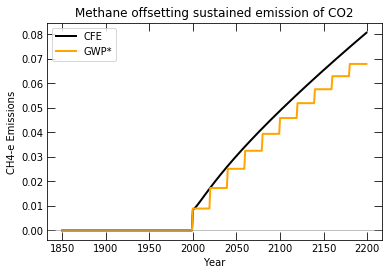

In [8]:
t = CO2StepTestEmissionsOutput['Year']
s = CO2StepTestEmissionsOutput['CFE']
v = CO2StepTestEmissionsOutput['GWP*']

fig, (ax) = plt.subplots()
ax.plot(t, s, color = 'black',linewidth = 2,label='CFE')
ax.plot(t, v, color = 'orange',linewidth = 2,label='GWP*')
ax.tick_params(axis='both',direction='in',length=8,right=True,top=True)
plt.legend()
# plt.xlim(0,200)
# plt.ylim(0,0.1)
ax.axhline(linewidth = 0.5, color='gray')

ax.set(xlabel='Year', ylabel='CH4-e Emissions',
       title='Methane offsetting sustained emission of CO2')
plt.show()
# plt.savefig('ITMO Graphs/CO2 Continuous Metric Emissions.png',dpi=500)

## Testing the GIR Input Style metric tool

This version takes in a range of scenarios and gases using the same format used in GIR. For each metric "method" specified a new "scenario" will be added to the returned dataframe for each original "scenario" in the GIR input. This allows us to quickly go from a multi-gas set of input emissions to a broad range of equivalents, and model their temperature impacts, without the need for reformatting.

In [26]:
# GIRTestScenarioNames = ['Pulse','Step']

start_year = 1850
end_year = 2200
timestep = 1
scen_names=['Pulse','Step']
gases_in = ['CO2','CH4','N2O']


CO2GIREmissions = pd.DataFrame(index=np.arange(start_year,end_year+1,timestep)+(timestep!=1)*timestep/2,columns=pd.MultiIndex.from_product([scen_names,gases_in],names=['Scenario','Gas'])).fillna(0).apply(pd.to_numeric)
CO2GIREmissions.index.rename('Year',inplace=True)



# Add emissions to the dataframe, N.B. GIR CO2 inputs are in GtC, CH4 and N2O in MtCH4 and MtN20-N2 respectively
K = 1000
GIRConversionCO2 = 12.0107/44.0095 # Convert GtCO2 -> GtC
GIRConversionCH4 = 1
GIRConversionN2O = 28.0134/44.013 # Convert MtN2O -> MtN2


TimePeriod = 351  # Years
Years = np.arange(1850, 2200).tolist()

# Pulse Emissions
PulseLLCPEmissions = np.zeros(TimePeriod).tolist()
PulseLLCPEmissions[150] = 1

# Step Emissions
StepLLCPEmissions = np.ones(TimePeriod).tolist()
StepLLCPEmissions[0:150] = np.zeros(150).tolist()


# Non-Metric Gas Emissions

CO2GIREmissions['Pulse','CO2'] = PulseLLCPEmissions
CO2GIREmissions['Step','CO2'] = StepLLCPEmissions

In [28]:
Methods = ["CFE", "GWP*"]

CH4eGIR = CH4efunctions.addCH4eMetricEmissions(CO2GIREmissions, Methods)


In [29]:
CH4eGIR[['Pulse','Step','Pulse - CFE','Step - CFE','Pulse - GWP*','Step - GWP*']].loc[1980:2020]

Scenario Pulse         Step         Pulse - CFE                Step - CFE  \
Gas        CO2 CH4 N2O  CO2 CH4 N2O         CO2       CH4  N2O        CO2   
Year                                                                        
1980.0     0.0   0   0  0.0   0   0         0.0  0.000000  0.0        0.0   
1981.0     0.0   0   0  0.0   0   0         0.0  0.000000  0.0        0.0   
1982.0     0.0   0   0  0.0   0   0         0.0  0.000000  0.0        0.0   
1983.0     0.0   0   0  0.0   0   0         0.0  0.000000  0.0        0.0   
1984.0     0.0   0   0  0.0   0   0         0.0  0.000000  0.0        0.0   
1985.0     0.0   0   0  0.0   0   0         0.0  0.000000  0.0        0.0   
1986.0     0.0   0   0  0.0   0   0         0.0  0.000000  0.0        0.0   
1987.0     0.0   0   0  0.0   0   0         0.0  0.000000  0.0        0.0   
1988.0     0.0   0   0  0.0   0   0         0.0  0.000000  0.0        0.0   
1989.0     0.0   0   0  0.0   0   0         0.0  0.000000  0.0        0.0   
1990.0     0.0   0   0  0.0   0   0         0.0  0.000000  0.0        0.0   
1991.0     0.0   0   0  0.0   0   0         0.0  0.000000  0.0        0.0   
1992.0     0.0   0   0  0.0   0   0         0.0  0.000000  0.0        0.0   
1993.0     0.0   0   0  0.0   0   0         0.0  0.000000  0.0        0.0   
1994.0     0.0   0   0  0.0   0   0         0.0  0.000000  0.0        0.0   
1995.0     0.0   0   0  0.0   0   0         0.0  0.000000  0.0        0.0   
1996.0     0.0   0   0  0.0   0   0         0.0  0.000000  0.0        0.0   
1997.0     0.0   0   0  0.0   0   0         0.0  0.000000  0.0        0.0   
1998.0     0.0   0   0  0.0   0   0         0.0  0.000000  0.0        0.0   
1999.0     0.0   0   0  0.0   0   0         0.0  0.000000  0.0        0.0   
2000.0     1.0   0   0  1.0   0   0         0.0  0.008337  0.0        0.0   
2001.0     0.0   0   0  1.0   0   0         0.0  0.000100  0.0        0.0   
2002.0     0.0   0   0  1.0   0   0         0.0  0.000159  0.0        0.0   
2003.0     0.0   0   0  1.0   0   0         0.0  0.000204  0.0        0.0   
2004.0     0.0   0   0  1.0   0   0         0.0  0.000240  0.0        0.0   
2005.0     0.0   0   0  1.0   0   0         0.0  0.000267  0.0        0.0   
2006.0     0.0   0   0  1.0   0   0         0.0  0.000289  0.0        0.0   
2007.0     0.0   0   0  1.0   0   0         0.0  0.000305  0.0        0.0   
2008.0     0.0   0   0  1.0   0   0         0.0  0.000317  0.0        0.0   
2009.0     0.0   0   0  1.0   0   0         0.0  0.000326  0.0        0.0   
2010.0     0.0   0   0  1.0   0   0         0.0  0.000333  0.0        0.0   
2011.0     0.0   0   0  1.0   0   0         0.0  0.000338  0.0        0.0   
2012.0     0.0   0   0  1.0   0   0         0.0  0.000341  0.0        0.0   
2013.0     0.0   0   0  1.0   0   0         0.0  0.000343  0.0        0.0   
2014.0     0.0   0   0  1.0   0   0         0.0  0.000344  0.0        0.0   
2015.0     0.0   0   0  1.0   0   0         0.0  0.000345  0.0        0.0   
2016.0     0.0   0   0  1.0   0   0         0.0  0.000345  0.0        0.0   
2017.0     0.0   0   0  1.0   0   0         0.0  0.000344  0.0        0.0   
2018.0     0.0   0   0  1.0   0   0         0.0  0.000343  0.0        0.0   
2019.0     0.0   0   0  1.0   0   0         0.0  0.000342  0.0        0.0   
2020.0     0.0   0   0  1.0   0   0         0.0  0.000341  0.0        0.0   

Scenario                Pulse - GWP*                Step - GWP*                 
Gas            CH4  N2O          CO2       CH4  N2O         CO2       CH4  N2O  
Year                                                                            
1980.0    0.000000  0.0          0.0  0.000000  0.0         0.0  0.000000  0.0  
1981.0    0.000000  0.0          0.0  0.000000  0.0         0.0  0.000000  0.0  
1982.0    0.000000  0.0          0.0  0.000000  0.0         0.0  0.000000  0.0  
1983.0    0.000000  0.0          0.0  0.000000  0.0         0.0  0.000000  0.0  
1984.0    0.000000  0.0          0.0  0.0000